In [93]:
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image
import pyglet
from pyglet.gl import *

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import scipy.misc
from scipy import ndimage

In [96]:
with_cbf = pd.read_excel('diff_uob_prob/70_removed_steps_cbf_filter_iter_1000.xlsx')
without_cbf = pd.read_excel('diff_uob_prob/no_cbf_filter_iter_1000.xlsx')
conversion = pd.read_excel('diff_uob_prob/removal_rates_table.xlsx')

table_val = conversion.values

print('with cbf shape: ', with_cbf.shape)
print('with cbf values: ', with_cbf.values)
print('without cbf shape: ', without_cbf.shape)
print('without cbf values: ', without_cbf.values)

with cbf shape:  (11, 2)
with cbf values:  [[0.49 0.43]
 [0.48 0.41]
 [0.57 0.38]
 [0.44 0.49]
 [0.64 0.36]
 [0.48 0.47]
 [0.54 0.42]
 [0.54 0.46]
 [0.52 0.48]
 [0.65 0.27]
 [0.72 0.2 ]]
without cbf shape:  (11, 2)
without cbf values:  [[0.82 0.1 ]
 [0.75 0.25]
 [0.73 0.24]
 [0.8  0.17]
 [0.8  0.11]
 [0.95 0.05]
 [0.71 0.13]
 [0.74 0.08]
 [0.77 0.07]
 [0.73 0.27]
 [0.72 0.11]]


In [97]:
with_cbf['method'] = 'with CBF data filter'
with_cbf['undesired_collision_behavior_prob'] = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
without_cbf['method'] = 'without CBF data filter'
without_cbf['undesired_collision_behavior_prob'] = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
df = pd.concat([with_cbf, without_cbf])
df

,collision%,overtake%,method,undesired_collision_behavior_prob
0,0.49,0.43,with CBF data filter,0.0
1,0.48,0.41,with CBF data filter,0.1
2,0.57,0.38,with CBF data filter,0.2
3,0.44,0.49,with CBF data filter,0.3
4,0.64,0.36,with CBF data filter,0.4
5,0.48,0.47,with CBF data filter,0.5
6,0.54,0.42,with CBF data filter,0.6
7,0.54,0.46,with CBF data filter,0.7
8,0.52,0.48,with CBF data filter,0.8
9,0.65,0.27,with CBF data filter,0.9


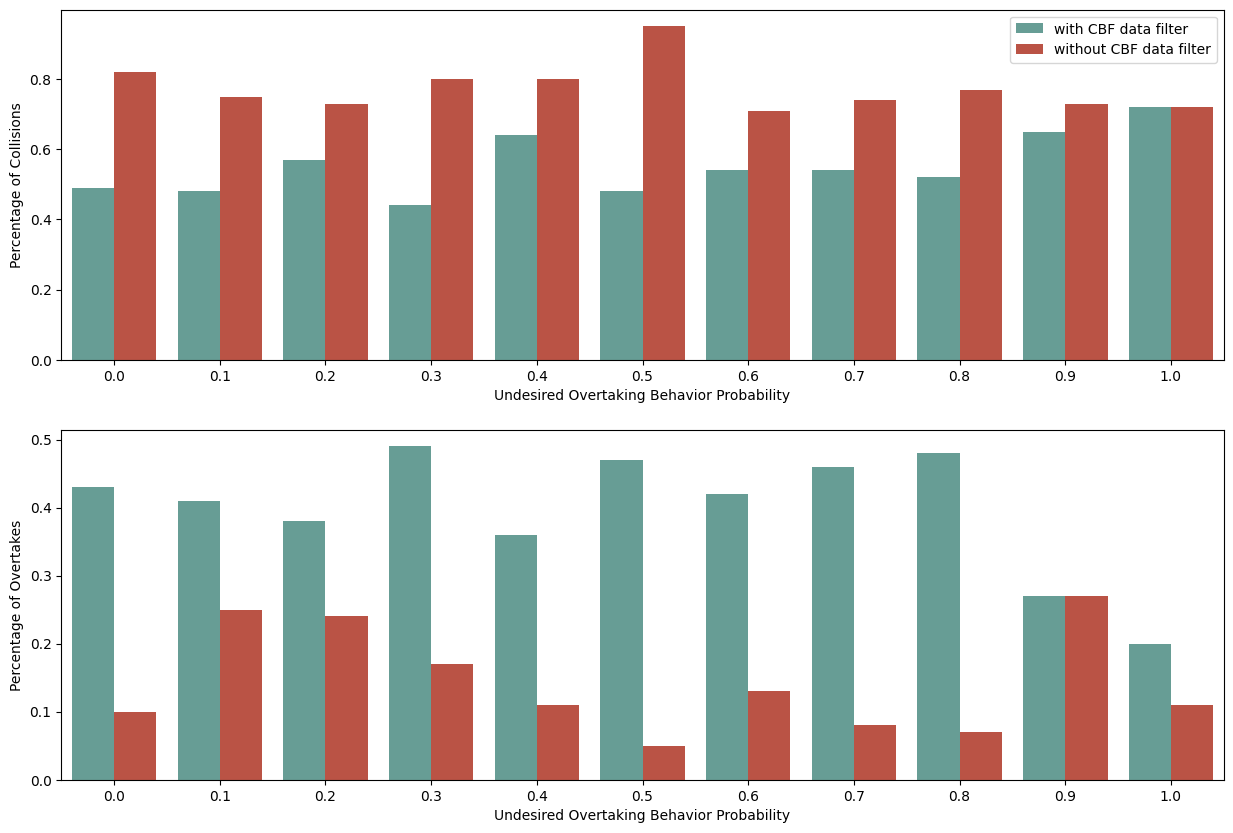

In [115]:
#fig, axarr = plt.subplots(3, 1, figsize=(15, 10), gridspec_kw={'height_ratios': [5, 5, 0.6]})

"""
axarr[2].axis('off')
table = axarr[2].table(cellText=table_val, 
                        rowLabels=['Undesired overtaking behavior probability', '% removed steps'], 
                        loc='center right', 
                        colWidths=[0.07]*11)
table.auto_set_font_size(False)
table.set_fontsize(10)
"""

fig, axarr = plt.subplots(2, 1, figsize=(15, 10))
a = sns.barplot(data=df, x="undesired_collision_behavior_prob", y='collision%', hue='method', palette= ["#5EA69C", "#CD4432"], ax=axarr[0])
#a.set_title('Percentage of collisions with different undesired overtaking behavior probability')
a.set_xlabel('Undesired Overtaking Behavior Probability')
a.set_ylabel('Percentage of Collisions')
a_legend = a.get_legend()
a_legend.set_title('')

b = sns.barplot(data=df, x="undesired_collision_behavior_prob", y='overtake%', hue='method', palette= ["#5EA69C", "#CD4432"], ax=axarr[1])
#b.set_title('Percentage of overtakes with different undesired overtaking behavior probability')
b.set_xlabel('Undesired Overtaking Behavior Probability')
b.set_ylabel('Percentage of Overtakes')
b.get_legend().remove()